# Titanic Dataset

### Aim

* Use machine learning to create a model that predicts which passengers **survived** the Titanic shipwreck
* This is a *binary classification* problem

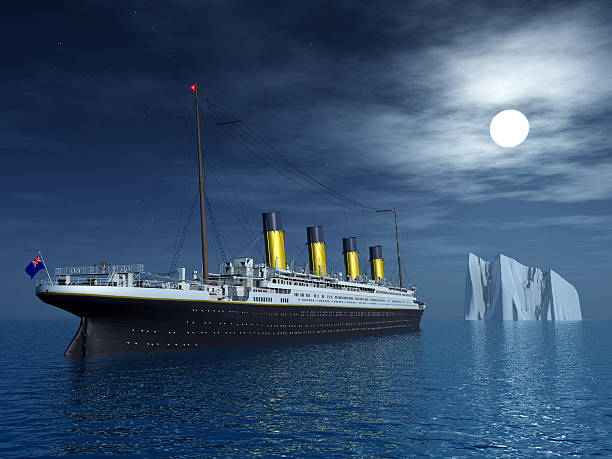

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


from mpl_toolkits.mplot3d import Axes3D

import math
import shap

### Pipeline


1. Import data
2. Exploratory data analysis
3. Data pre-processing
4. Feature engineering
5. Model preparation
    * train-test split
    * balancing dataset
6. Model build
    * model 1
7. Model evaluation
8. Feature importance

### 1. Import Data

#### About the dataset: 

There are 2 datasets

1. Training data: includes labels on those individuals who survived and those who did not

2. Test data: excludes labels

In [3]:
# Import data 

df_train = pd.read_csv('train.csv')


#### Data dictionary 

1. PassengerID
2. Survived
    * 0 : <font color='teal'> No </font>
    * 1 : <font color='teal'> Yes </font>
3. Pclass - ticket class - serves as a proxy for socio-economic status
    * 1 : <font color='teal'> Upper </font>
    * 2 : <font color='teal'> Middle </font>
    * 3 : <font color='teal'> Lower </font>
4. Name 
5. Sex
6. Age
    * Measured in years 
7. SibSp
    The dataset defines family relations in this way...
    * Sibling : <font color='teal'> brother, sister, stepbrother, stepsister  </font>
    * Spouse :  <font color='teal'> husband, wife (mistresses and fiancés were ignored)  </font>
8. Parch
    The dataset defines family relations in this way...
    * Parent : <font color='teal'> mother, father   </font>
    * Child : <font color='teal'> daughter, son, stepdaughter, stepson   </font>
    * Some children travelled only with a nanny, therefore parch=0 for them.
9. Ticket
    Ticket number
10. Fare
11. Cabin
    Cabin number
12. Embarked
     Site the passenger boarded 
     * C :  <font color='teal'> Cherbourg  </font>
     * Q :  <font color='teal'> Queenstown  </font>
     * S :  <font color='teal'> Southampton  </font>

### 2. Exploratory Data Analysis

In [4]:
df_train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***

From above it can be seen that there are 891 passengars in the data set <br>
(it is interesting to note that there were infact 2 240 passengers and crew on board and 1500 lost their lives)
<br>
There are 12 features with 6 categorical and 6 continous features 
    * The mean age of passengers was 29.7 with a range of 0 - 80 and IQR of 20 - 38
    * The mean fare was £32 with a range of £0 - £512 and IQR of £7.9 - £31
<br>
3 of the features have missing values: 
    * Age: 177 missing
    * Cabin: 687 missing
    * Embarked: 2 missing
    
***


#### i. Univariate Analysis

##### Countplots for categorical features

From the below plots it is noted that more patients died than survived. <br>
Majority of passengers were in the 3rd class accomodation. <br>
Majority of passengers were male. <br>
Most passengers had no siblings on board. <br>
Most passengers boarded in Southampton. <br>

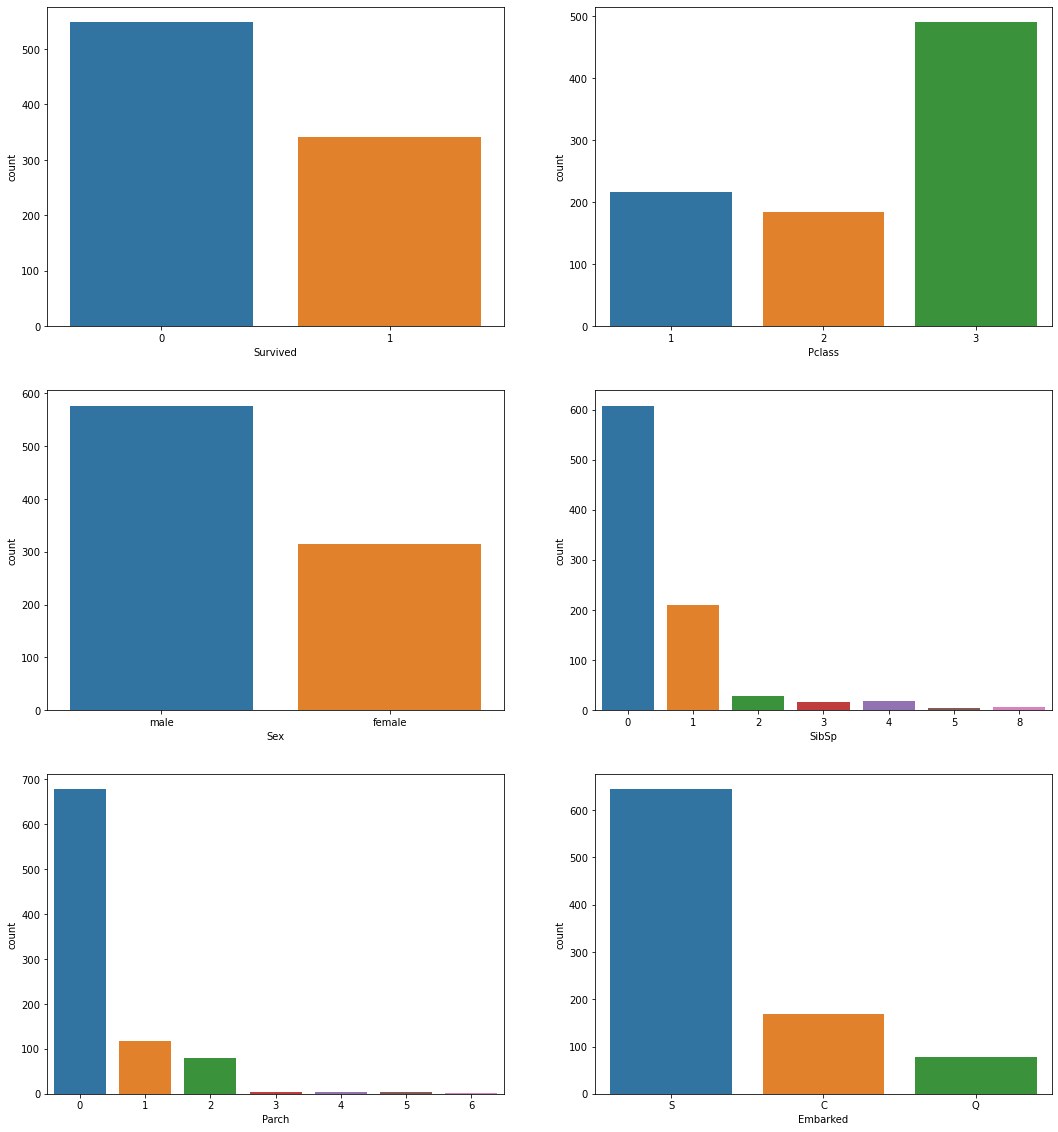

In [9]:
# Creating countplots for categorical features

fig1, axes = plt.subplots(3,2,figsize=(18,20))
cols = ['Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Embarked']
# Iterating through axes and names
for name, ax in zip(cols, axes.flatten()):
    sns.countplot(x= name, data=df_train, ax=ax)
    

##### Distribution plots for continuous variables

Age is almost normally distributed. <br>
Majority of patient lie between the ages of 20 - 40

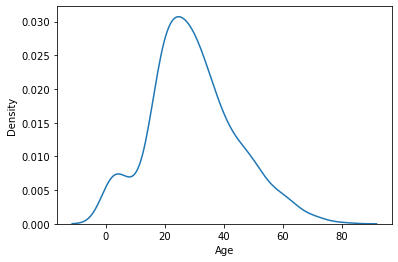

In [10]:
data = df_train['Age']
res = sns.kdeplot(data)
plt.show()

The fare is positively skewed. <br>


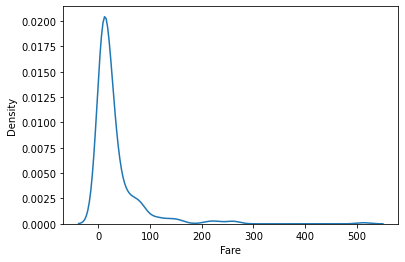

In [11]:
data = df_train['Fare']
res = sns.kdeplot(data)
plt.show()

#### ii. Bivariate Analysis

The plots below illustrate the differences in distribution of data between the two outcome variables. 

Some insights that can be derived include: 

 - for those who died, majority are noted to be within the 3rd class 
 - the age of those who died appear to be higher than those who survived. It can be noted that during the evacuation, children and women boarded the ships prior to men. Thus this is the pattern that may have emerged. 

The `size` parameter has been renamed to `height`; please update your code.


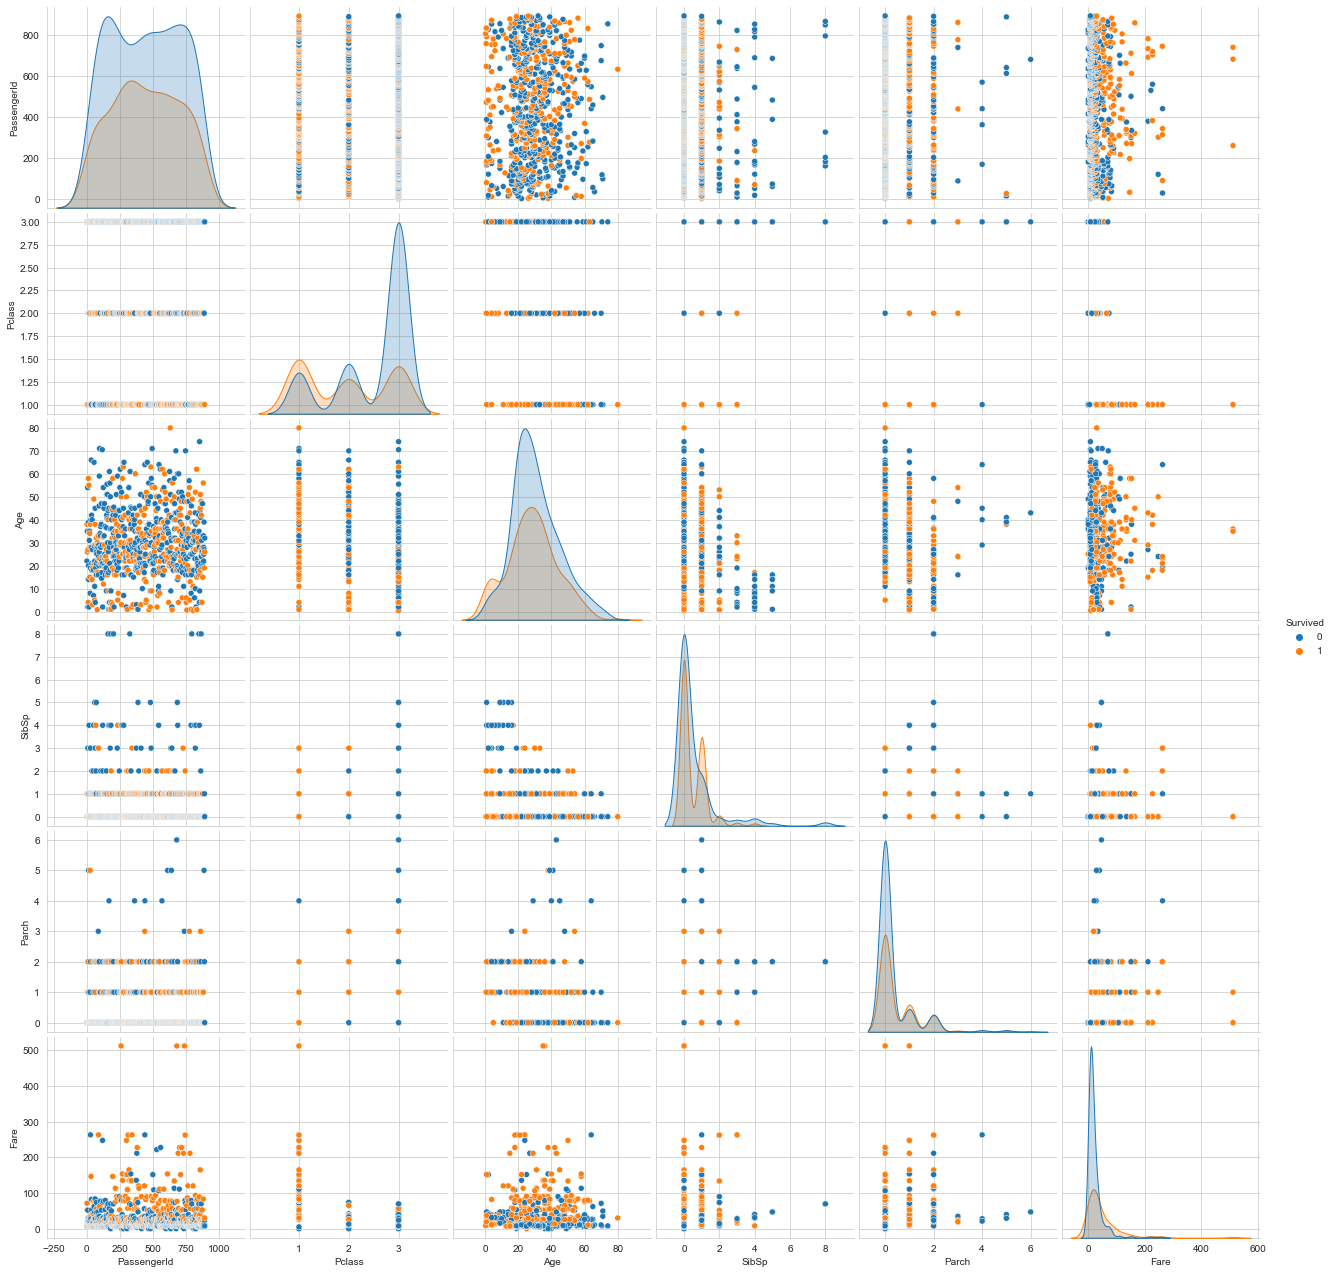

In [12]:
sns.set_style("whitegrid");
sns.pairplot(df_train, hue="Survived", size=3);
plt.show()

In [13]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

For the box and whiskers plots below - it is noted that for those who survived vs those who did not survived: 

- Age was fairly similar for the two groups with few outliers. 
- Those who died were generally slightly older
- Fare has numerous outliers. Could consider removal in a second model comparing it to the performance of the model in this sheet. 

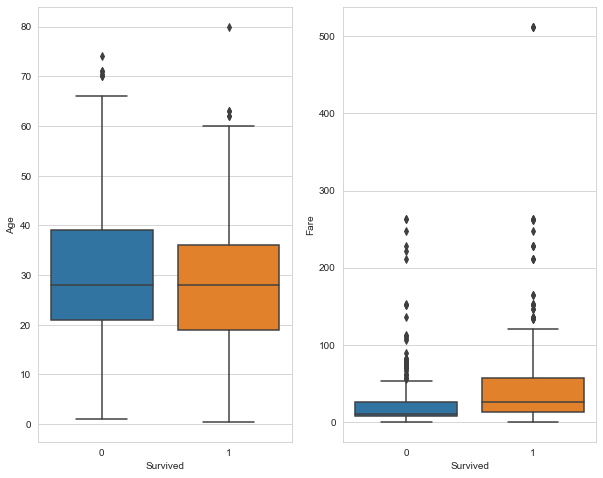

In [41]:
# Creating subplot axes
fig1, axes = plt.subplots(1,2,figsize=(10,8))
cols = ['Age','Fare']
# Iterating through axes and names
for name, ax in zip(cols, axes.flatten()):
    sns.boxplot(y=name, x= 'Survived', data=df_train, orient='v', ax=ax)

#### iv. Correlation Plot

None of the variables are strongly correlated. Thus they can all be retained. 

<AxesSubplot:>

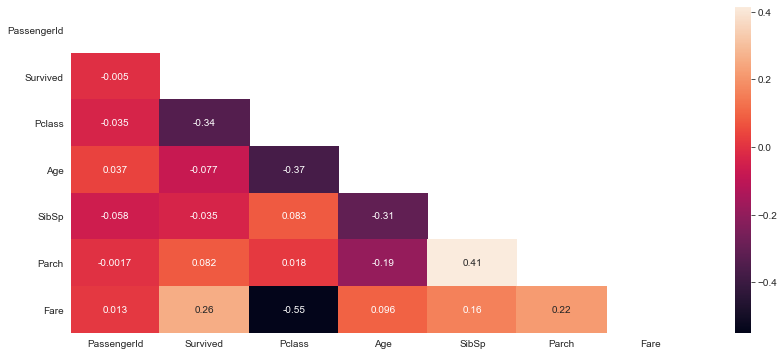

In [42]:
fig, ax = plt.subplots(figsize=(14, 6)) 
mask = np.zeros_like(df_train.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_train.corr(), mask= mask, ax= ax, annot= True)

### 3. Data Preprocessing

Dealing with missing values

Various methods can be used to deal with missing values:

- linear regression: when there are features that are highly correlated we can estimate a given value based on another value
- we can replace with mean, median and mode
- can use knn. This method uses the most frequent value for neighbours in discrete variables and for continuous variables uses mean or mode


Summary of missing data from: 
https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/

In this case we will impute age using the mean as there are few outliers in this case <br>
The column cabin will be removed as many values are missing and it is a categorical feature unrelated to any other feature <br>
The rows for embarked have been removed

In [17]:
df_missing_removed = df_train.drop(['Cabin'],axis=1)

In [18]:
df_missing_removed['Age'] = df_missing_removed['Age'].fillna(df_missing_removed['Age'].mean())

In [19]:
#This will drop the rows with embarked missing
df_missing_removed = df_missing_removed.dropna(axis=0)

In [20]:
df_missing_removed.shape

(889, 11)

In [21]:
df_missing_removed.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### 4. Feature Engineering

In [22]:
# For this first model no features will be engineered 

### 5. Model Preparation

One hot encode

In [23]:
df_model = pd.get_dummies(df_missing_removed, columns=['Sex', 'Embarked'])

In [24]:
df_model.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


Train test split

In [25]:
#Separating the dataset in x which are the features and y which is the label
feature_names=['Pclass', 'Sex_female','Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q','Embarked_S']
X = df_model[feature_names].values
y = df_model[['Survived']].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### 6. Model Build

#### Hyperparameter Tuning

In [27]:
scaler = MinMaxScaler()

In [28]:
# create pipeline with a scaler 
steps = [('scaler', scaler), ('RF', RandomForestClassifier(random_state=42))]
pipeline = Pipeline(steps)

In [29]:
rf_param_grid = {"RF__max_depth": [3, None],
              "RF__max_features": [1, 3, 10],
              "RF__min_samples_split": [1, 3, 10],
              "RF__min_samples_leaf": [1, 3, 10],
              "RF__bootstrap": [True, False],
              "RF__criterion": ["gini", "entropy"]}


In [30]:
# do search
search_RF = GridSearchCV(pipeline,rf_param_grid,n_jobs=-1,scoring='accuracy',cv=3,verbose=2)

In [31]:
search_RF.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits



216 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MSI\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\MSI\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\MSI\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\U

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('RF',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'RF__bootstrap': [True, False],
                         'RF__criterion': ['gini', 'entropy'],
                         'RF__max_depth': [3, None],
                         'RF__max_features': [1, 3, 10],
                         'RF__min_samples_leaf': [1, 3, 10],
                         'RF__min_samples_split': [1, 3, 10]},
             scoring='accuracy', verbose=2)

In [32]:
search_RF.best_params_

{'RF__bootstrap': False,
 'RF__criterion': 'gini',
 'RF__max_depth': None,
 'RF__max_features': 1,
 'RF__min_samples_leaf': 1,
 'RF__min_samples_split': 10}

In [33]:
rfc_predict = search_RF.predict(X_test)

In [34]:
print(confusion_matrix(y_test, rfc_predict))

[[88 21]
 [20 49]]


In [35]:
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       109
           1       0.70      0.71      0.71        69

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



In [36]:
CF=confusion_matrix(y_test,rfc_predict)

Text(0.5, 16.0, 'Predicted label')

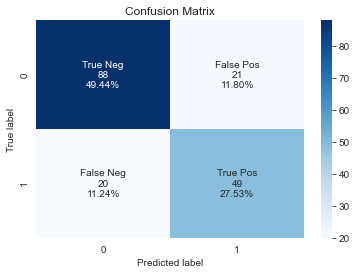

In [37]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in CF.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in CF.flatten()/np.sum(CF)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CF, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [38]:
rfc_predict_probs = search_RF.predict_proba(X_test)
y_hat=rfc_predict_probs[:,1]

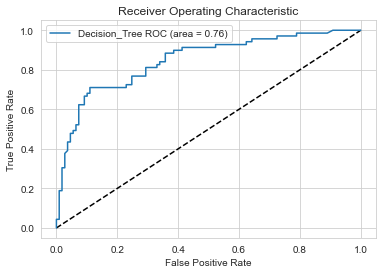

In [39]:
# Compute False postive rate, and True positive rate
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_hat)

# Calculate Area under the curve to display on the plot
roc_auc = metrics.roc_auc_score(y_test, rfc_predict)

# Now, plot the computed values
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= '%s ROC (area = %0.2f)' % ("Decision_Tree", roc_auc)) #"XGBoost Aki")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

### 7. Model Explainability with Shapley

In [48]:
explainer = shap.TreeExplainer(search_RF)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.model_selection._search.GridSearchCV'>

The plot below illustrates the feature importance of the features in the model. <br>
It illustrates which features contribute more to the model importance and which less. <br>
It is can be seen that the features that contribute the most to the model include: 
 - sex
 - Fare 
 - Class 
 - Age

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


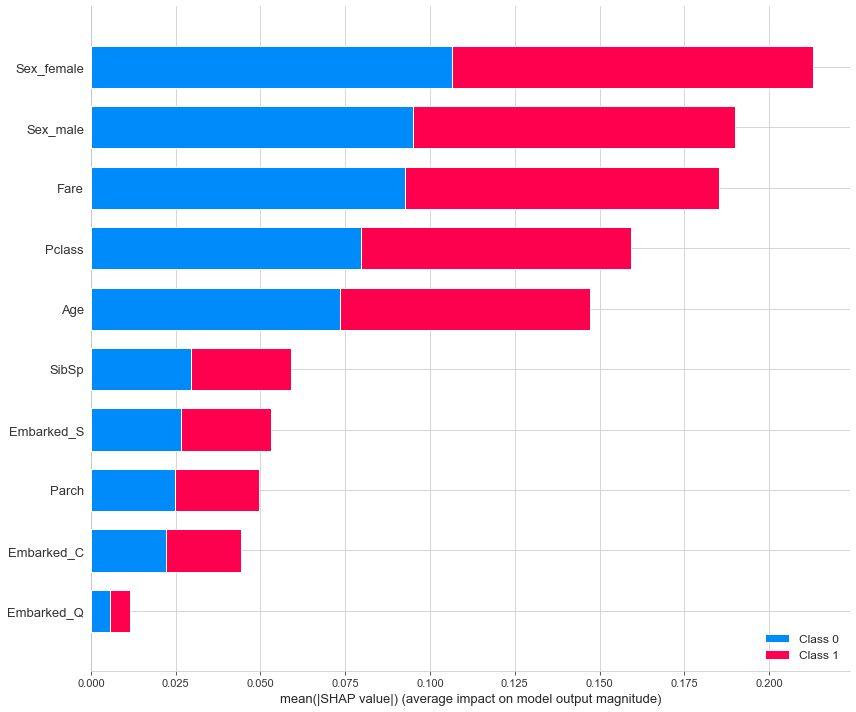

In [45]:
# fit the preprocessor 
X_encoded = search_RF.best_estimator_['scaler'].fit_transform(X_train)

# fit the model 
best_model = search_RF.best_estimator_['RF'].fit(X_encoded, y_train)

# calculate the Shap values
shap_values = shap.TreeExplainer(best_model).shap_values(X_encoded,approximate=True)

# plot the Shap values
shap.initjs()
plt.figure(figsize=(13, 13))
shap.summary_plot(shap_values, X_encoded,feature_names=df_model[feature_names].columns,plot_size=[12,10])

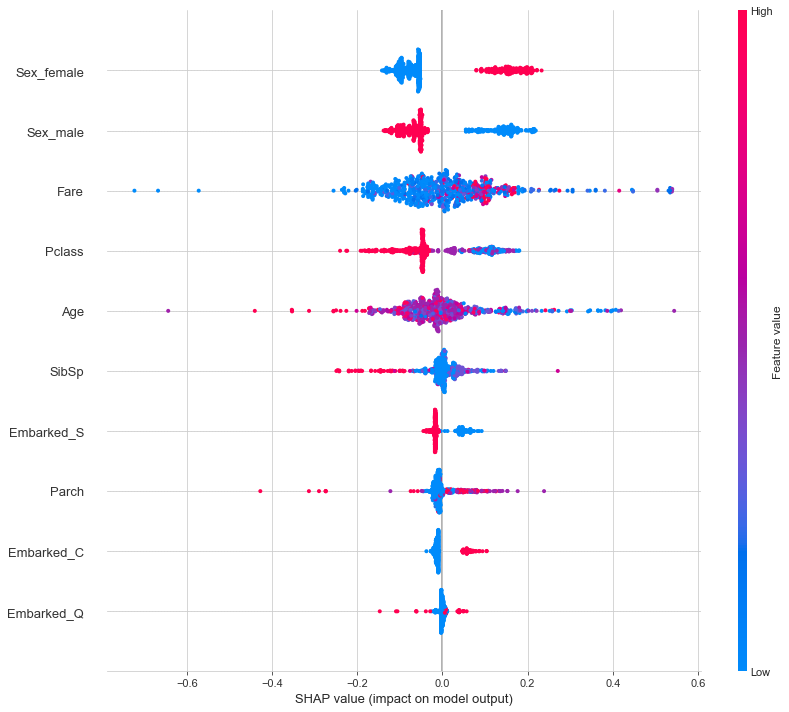

In [47]:
shap.initjs()

# Let us have a look on SHAP summary plot
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_encoded, approximate=True, check_additivity=False)

shap.summary_plot(shap_values[1], X_encoded,feature_names=df_model[feature_names].columns,plot_size=[12,10])